# Mushroom Classification  🍄

## Import Libraries

In [1]:
# These installs are required each time you switch from/to CPU/GPU
!pip install scikeras
!pip install np_utils

In [2]:
# Dependencies and Libraries

# Tensorflow
import tensorflow as tf

# Other machine learning modules
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Commonly used modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

## Load Dataset

In [3]:
# Dataset
url = "mushrooms.csv"

In [4]:
# Read in data and examine it
dataset = pd.read_csv(url)

## Summarize Dataset

In [5]:
# Look at the data
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# Rows and columns
dataset.shape

(8124, 23)

In [7]:
# Descriptive Statistics
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
# Datatypes and names of columns
dataset.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [9]:
# Check for Null values
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
# Look at data distribution
for x in dataset.columns:
  print(f"Column: {x}")
  print("-"*20)
  print(dataset[x].value_counts())
  print("")

Column: class
--------------------
class
e    4208
p    3916
Name: count, dtype: int64

Column: cap-shape
--------------------
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

Column: cap-surface
--------------------
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

Column: cap-color
--------------------
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

Column: bruises
--------------------
bruises
f    4748
t    3376
Name: count, dtype: int64

Column: odor
--------------------
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

Column: gill-attachment
--------------------
gill-attachment
f    7914
a     210
Name: count, dtype: int64

Column: gill-spacing
--------------------
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

Column: gill-size
----

Veil-type has the same value for every row in the data. We will drop it. There is no need to scale the data because it is all categorical.

In [11]:
# Drop veil-type and verify
dataset = dataset.drop(columns = "veil-type")
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [12]:
# Convert to numeric
for x in dataset.columns:
  dataset[x], _ = pd.factorize(dataset[x])

In [13]:
# Check that it worked
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


## Algorithm Evaluation

## Separate Features from Labels

In [14]:
# Labels
y = dataset['class']
# Features
X = dataset.drop(columns = 'class')

## Split Dataset into Training and Testing Sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Split Training Dataset Further into Training and Validation

In [16]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, random_state=1)

## Convert to Numpy Arrays

In [17]:
# Convert to numpy array
X_train = X_train.to_numpy()
X_validate = X_validate.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_validate = y_validate.to_numpy()
y_test = y_test.to_numpy()

## Check Shape of Each of the New Datasets

In [18]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of X_validate: {X_validate.shape}")

print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_validate: {y_validate.shape}")

Shape of X_train: (4569, 21)
Shape of X_test: (2031, 21)
Shape of X_validate: (1524, 21)
Shape of y_train: (4569,)
Shape of y_test: (2031,)
Shape of y_validate: (1524,)


In [19]:
train_class_counts = {label: (y_train == label).sum() for label in np.unique(y_train)}
test_class_counts = {label: (y_test == label).sum() for label in np.unique(y_test)}

print(f"Distribution of y_train: {train_class_counts}")
print(f"Distribution of y_test: {test_class_counts}")

Distribution of y_train: {0: 2186, 1: 2383}
Distribution of y_test: {0: 1011, 1: 1020}


# Training

## Function to Create Learning Curve

In [20]:
def plotLearningCurve(model, title, X, y, ax=None):
  train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  if ax is None:
    plt.figure()
    ax = plt.gca()
  ax.set_title(title)
  ax.set_xlabel("Training examples")
  ax.set_ylabel("Score")
  ax.grid()
  ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.1, color="r")
  ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                  test_scores_mean + test_scores_std, alpha=0.1, color="purple")
  ax.plot(train_sizes, train_scores_mean, 'o-', color='r',
          label="Training score")
  ax.plot(train_sizes, test_scores_mean, 'o-', color='purple',
          label="Cross-validation score")
  ax.legend(loc="best")
  return ax

## Function to Create ROC Curve

In [21]:
def plot_roc_curve(model, X, y, ax=None):
  if hasattr(model, "decision_function"):
    scores = model.decision_function(X)
  else:
    scores=model.predict(X)
  fpr, tpr, _ = roc_curve(y, scores)
  roc_auc = auc(fpr, tpr)
  if ax is None:
    plt.figure()
    ax = plt.gca()
  ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, color='hotpink')
  ax.plot([0,1],[0,1], 'k--')
  ax.set_xlim([0.0,1.0])
  ax.set_ylim([0.0,1.05])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('ROC Curve')
  ax.legend(loc="lower right")
  return ax

## Function to Fit Model(s) on the Training Set and Make Predictions

In [22]:
# Loop over each model in an array of models.
def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    # Fit the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Evaluate F1
    f1 = f1_score(y_test, y_pred)

    ## Print Results
    print(f"Model: {name}, Accuracy: {accuracy}, F1 Score: {f1}")

    # Plot the Learning Curve and ROC Curve
    fig, axes = plt.subplots(1,3, figsize=(12,6))
    fig.suptitle(f"{name} - Accuracy: {accuracy}, F1 Score: {f1}")
    plotLearningCurve(model, f"Learning Curve - {name}", X_train, y_train, ax=axes[0])
    plot_roc_curve(model, X_test, y_test, ax=axes[1])

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
    axes[2].set_title("Confusion Matrix")
    axes[2].set_xlabel(" Predicted Labels")
    axes[2].set_ylabel("True Labels")

    plt.savefig(f"learning_curve-ROC-images/{name}training.png")
    plt.show()
    print("\n")

    # Print Classification Report
    print("Classification Report: ")
    print(classification_report(y_test, y_pred))

## Create an Array of Algorithms

In [23]:
# Initializes an array called models.
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('FOREST', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Model: LR, Accuracy: 0.9847365829640571, F1 Score: 0.9847665847665847


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


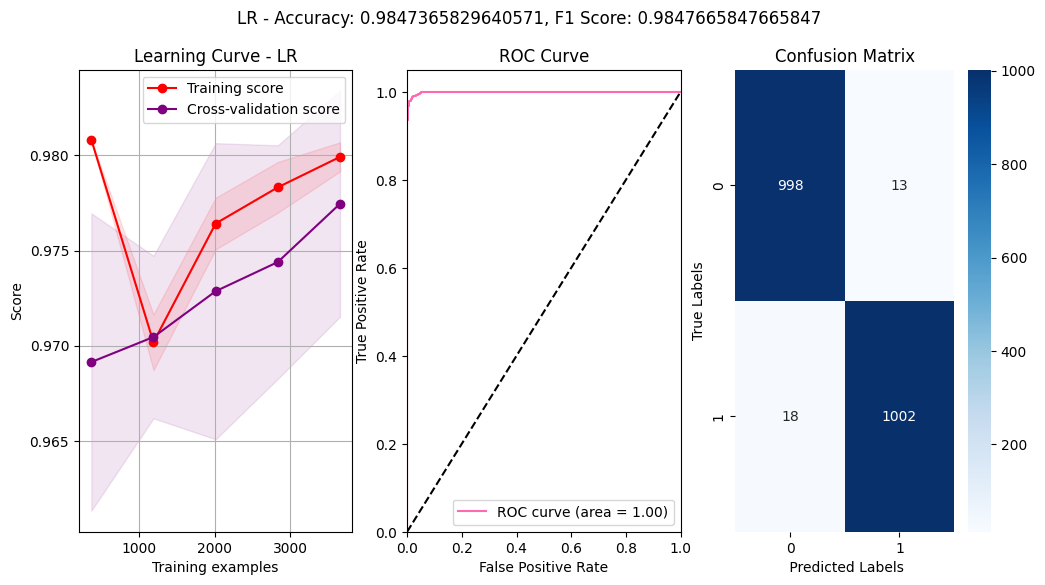



Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1011
           1       0.99      0.98      0.98      1020

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031

Model: LDA, Accuracy: 0.9620876415558838, F1 Score: 0.9621249385145105


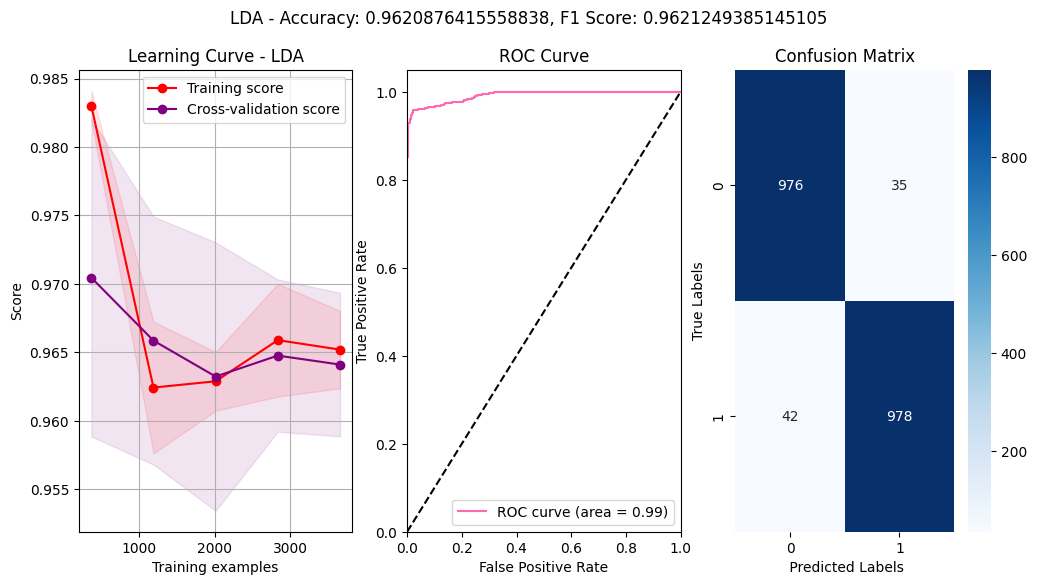



Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1011
           1       0.97      0.96      0.96      1020

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031

Model: KNN, Accuracy: 0.9970457902511078, F1 Score: 0.99706457925636


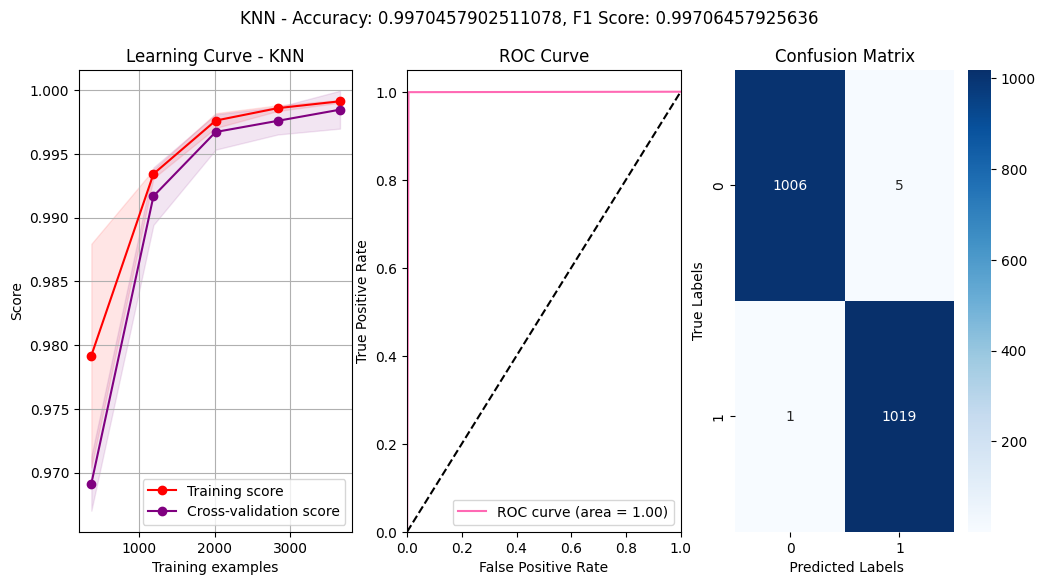



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Model: CART, Accuracy: 1.0, F1 Score: 1.0


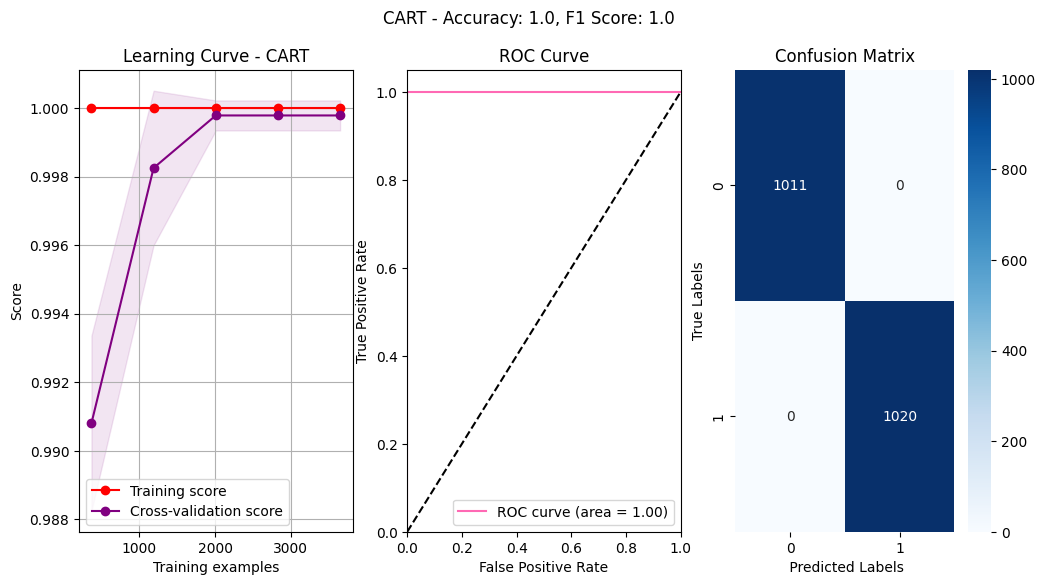



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Model: FOREST, Accuracy: 1.0, F1 Score: 1.0


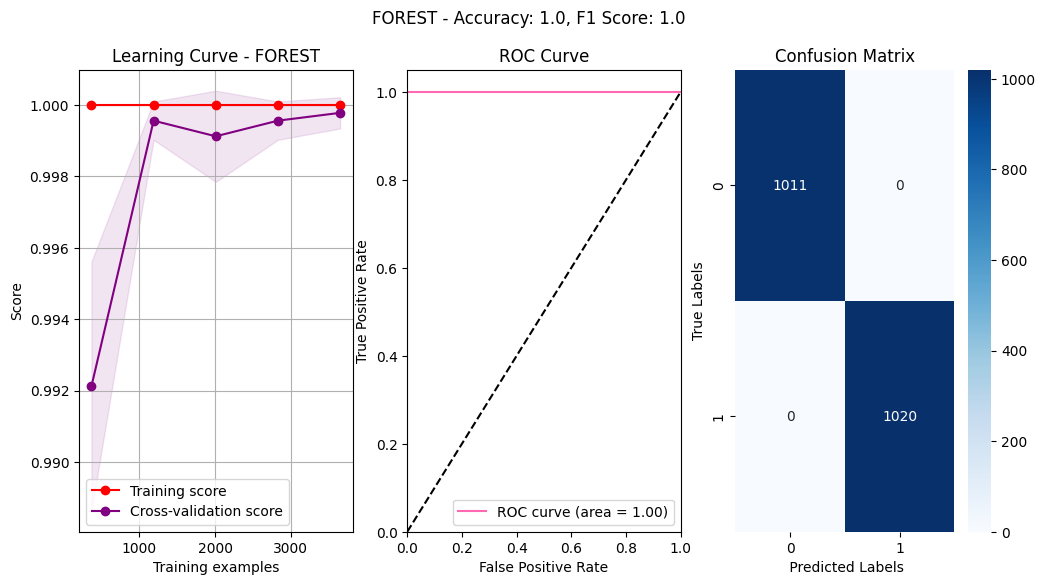



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Model: NB, Accuracy: 0.9246676514032496, F1 Score: 0.9286047596826879


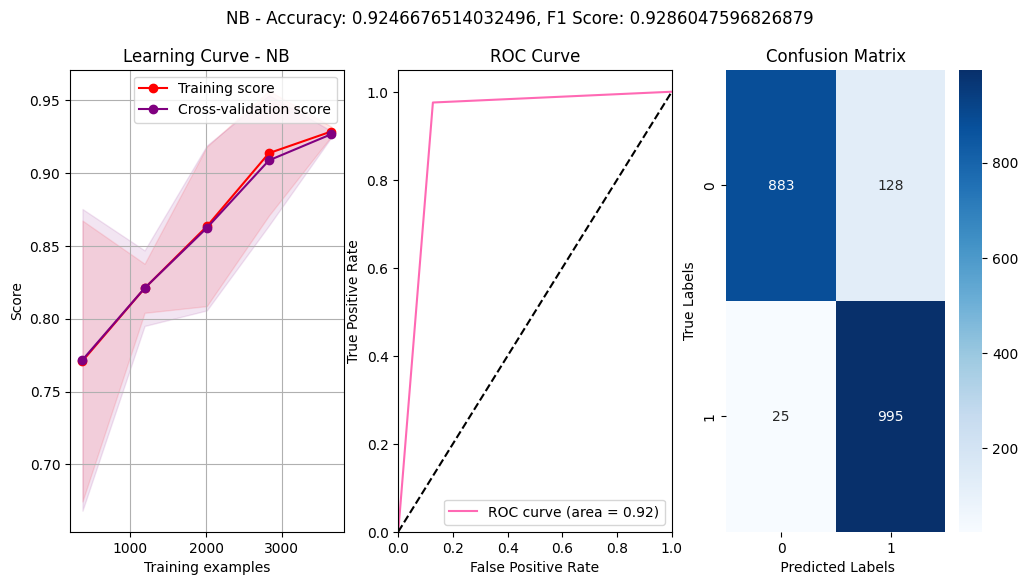



Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1011
           1       0.89      0.98      0.93      1020

    accuracy                           0.92      2031
   macro avg       0.93      0.92      0.92      2031
weighted avg       0.93      0.92      0.92      2031

Model: SVM, Accuracy: 0.9975381585425899, F1 Score: 0.9975550122249389


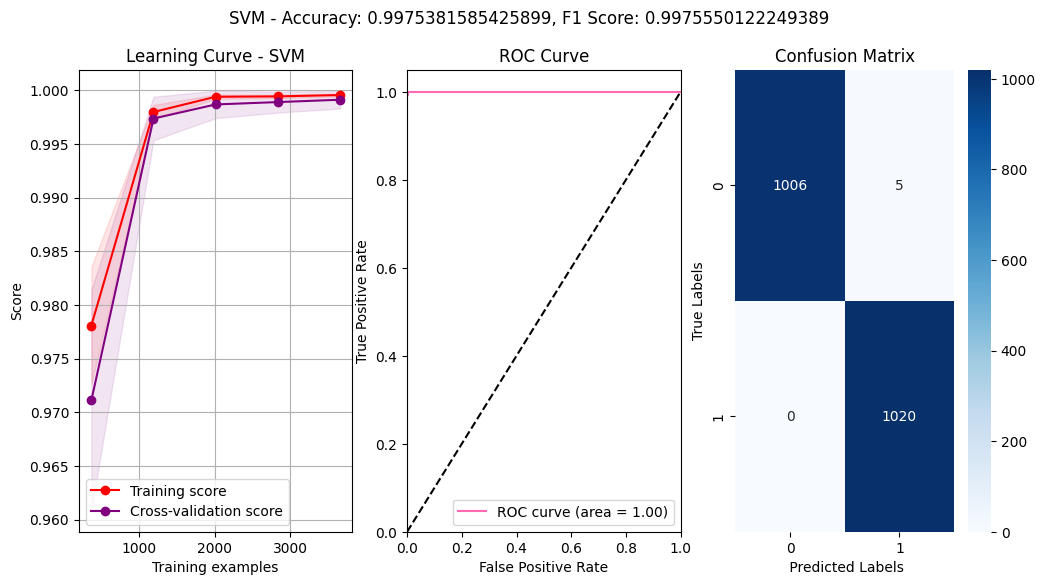



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [24]:
for name, model in models:
  evaluate_model(model, X_train, y_train, X_test, y_test, name)

Factorizing the dataset was easy to do but we had a concern that doing so would mean that the model might learn that 0,1,2,3,4, etc meant that closer to 0 was more or less important than closer to 4 for example. Therefore we went back to the beginning and tried one hot encoding instead.



# Same Process With One Hot Encoding

In [25]:
# Read in data and examine it
dataset = pd.read_csv(url)

In [26]:
# Drop veil-type and verify
dataset = dataset.drop(columns = "veil-type")
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [27]:
# Labels
y = (dataset['class'].replace({'p':0, 'e':1}))
# Features
X = dataset.drop(columns = 'class')

In [28]:
# Another way to convert to numeric categorical values is to use pandas get_dummies.
X = pd.get_dummies(X)

In [29]:
# Check that it worked
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


## Split Dataset into Training and Testing Sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Split Training Dataset Further into Training and Validation

In [31]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, random_state=1)

## Check Shape of Each of the New Datasets

In [32]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of X_validate: {X_validate.shape}")

print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_validate: {y_validate.shape}")

Shape of X_train: (4569, 116)
Shape of X_test: (2031, 116)
Shape of X_validate: (1524, 116)
Shape of y_train: (4569,)
Shape of y_test: (2031,)
Shape of y_validate: (1524,)


In [33]:
train_class_counts = {label: (y_train == label).sum() for label in np.unique(y_train)}
test_class_counts = {label: (y_test == label).sum() for label in np.unique(y_test)}

print(f"Distribution of y_train: {train_class_counts}")
print(f"Distribution of y_test: {test_class_counts}")

Distribution of y_train: {0: 2186, 1: 2383}
Distribution of y_test: {0: 1011, 1: 1020}


Model: LR, Accuracy: 0.9975381585425899, F1 Score: 0.9975550122249389


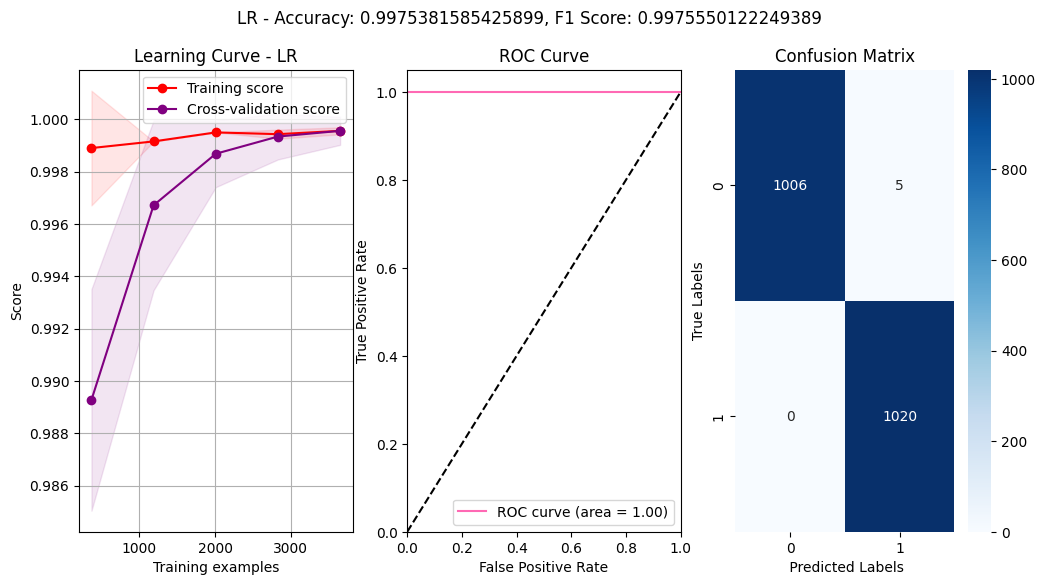



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Model: LDA, Accuracy: 0.9980305268340719, F1 Score: 0.9980430528375733


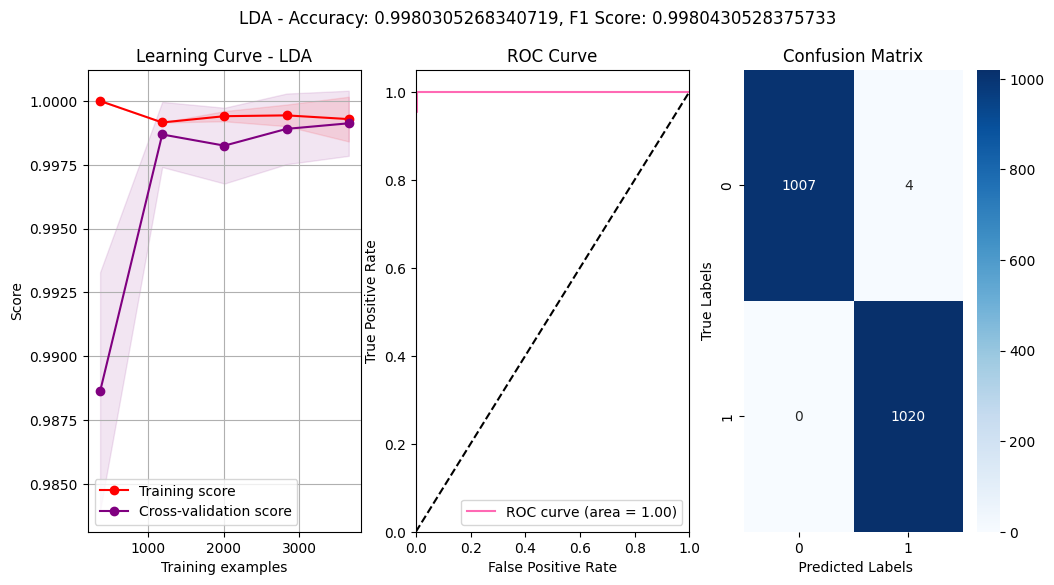



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Model: KNN, Accuracy: 0.9975381585425899, F1 Score: 0.9975550122249389


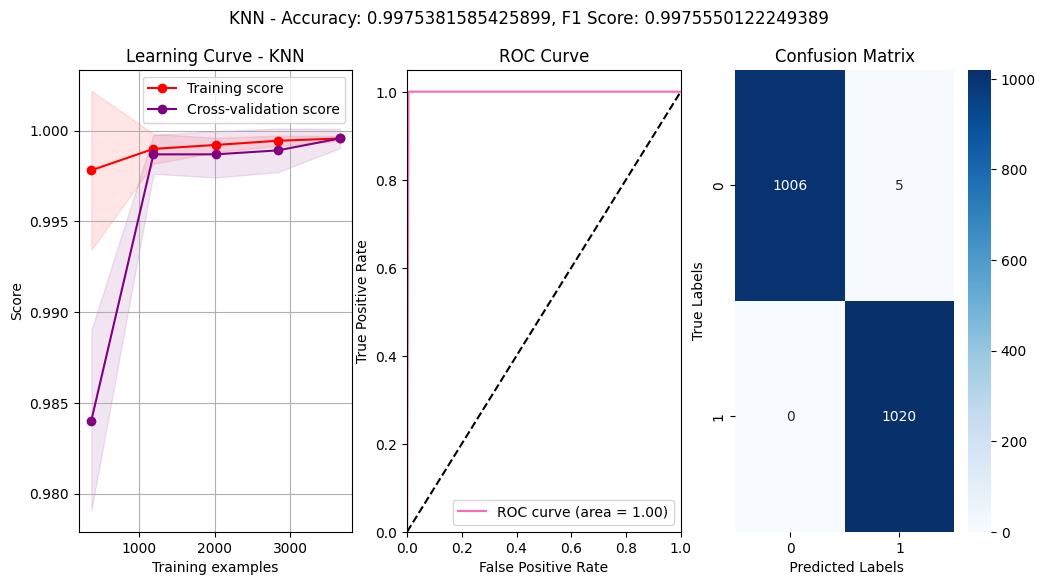



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Model: CART, Accuracy: 1.0, F1 Score: 1.0


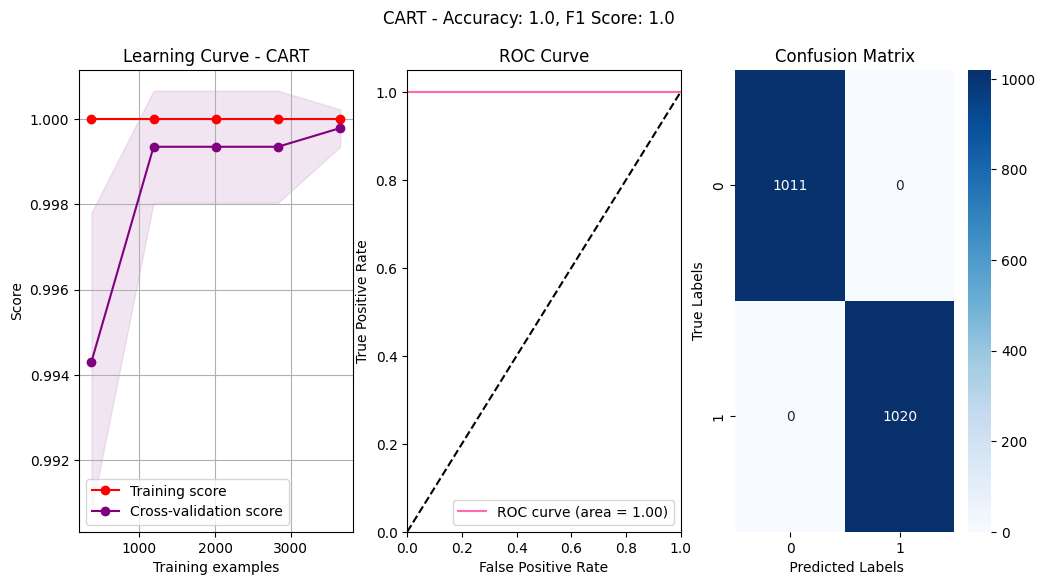



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Model: FOREST, Accuracy: 1.0, F1 Score: 1.0


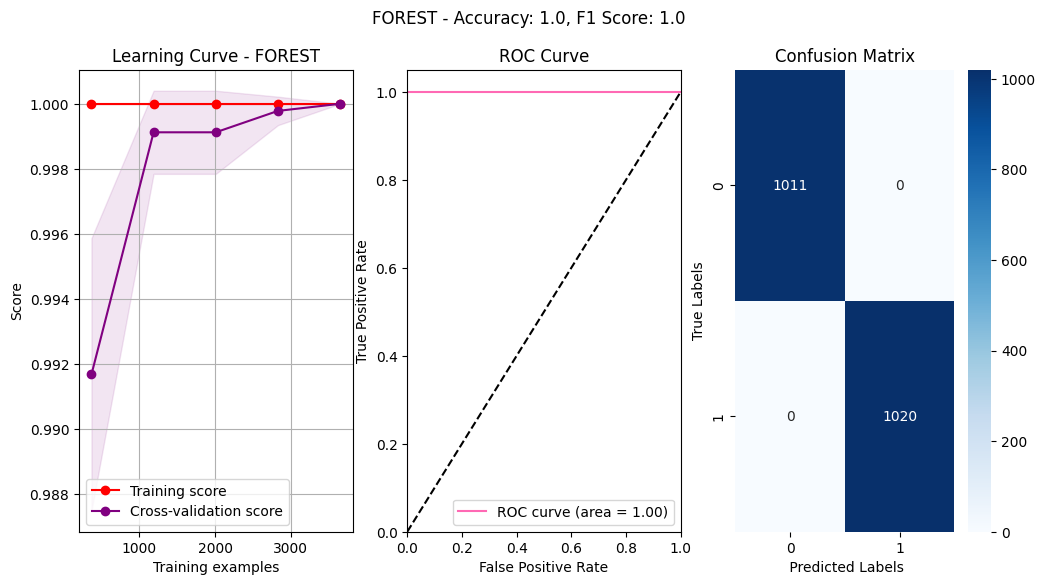



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Model: NB, Accuracy: 0.9379615952732644, F1 Score: 0.9344432882414152


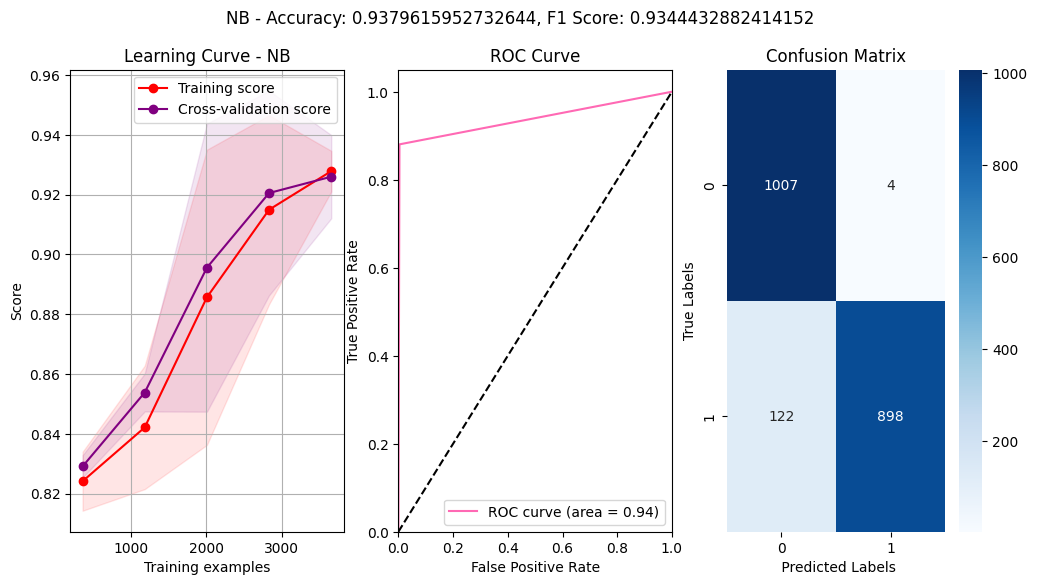



Classification Report: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1011
           1       1.00      0.88      0.93      1020

    accuracy                           0.94      2031
   macro avg       0.94      0.94      0.94      2031
weighted avg       0.94      0.94      0.94      2031

Model: SVM, Accuracy: 0.9985228951255539, F1 Score: 0.9985315712187959


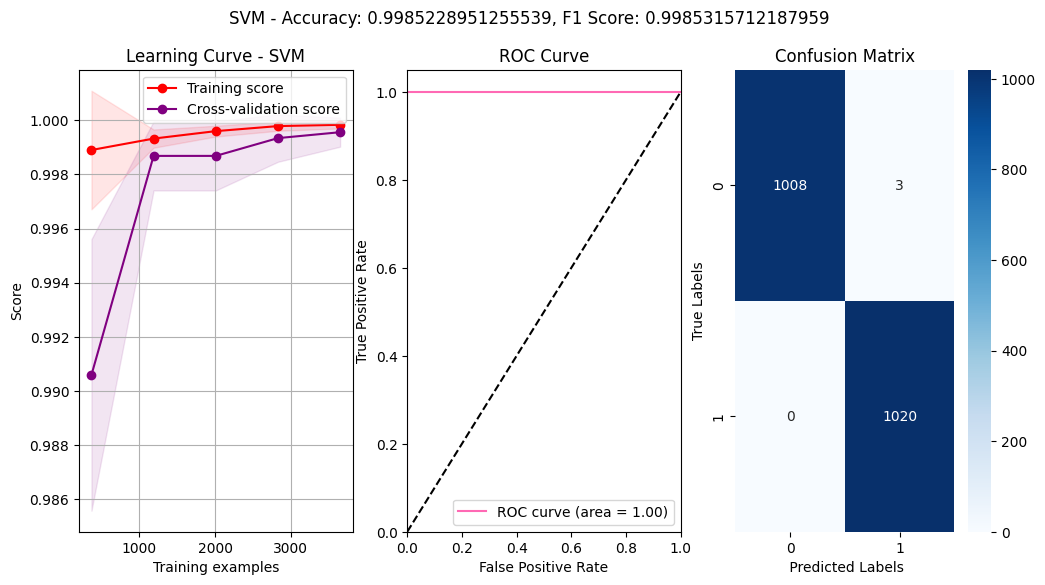



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [34]:
for name, model in models:
  evaluate_model(model, X_train, y_train, X_test, y_test, name)

# Hypertuning

Based on the output above, we decided to look further at Logistic Regression, Decision Tree Classifier, and Random Forest Classifier.

## Function for Hypertuning Using Randomized Grid Search

In [35]:
def model_hypertuning(model, param_grid, X, y, n_iter=10):

  # Initialize RandomSearchCV with the specified model and parameter distributions
  random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=n_iter, cv=5, scoring='accuracy', n_jobs=-1)

  # Perform randomized search cross-validation
  random_search.fit(X_train, y_train)

  # Get the best hyperparameters
  best_params = random_search.best_params_

  return best_params

## Parameter Grids

In [36]:
# Logistic Regression
param_lr ={
    'C': [0.1, 1.0, 10.0],
    #'penalty': ['l1', 'l2']
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Decision Tree Classifier
param_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest Classifier
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Hypertuning Logistic Regression

In [37]:
best_model_lr_random = model_hypertuning(LogisticRegression(), param_lr, X_validate, y_validate, n_iter=10)
print(f"Best parameters for Logistic Regression (Randomized): {best_model_lr_random}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Logistic Regression (Randomized): {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10.0}


## Hypertuning Decision Tree Classifier

In [38]:
best_model_dt_random = model_hypertuning(DecisionTreeClassifier(), param_dt, X_validate, y_validate, n_iter=10)
print(f"Best parameters for Decision Tree Classifier (Randomized): {best_model_dt_random}")

Best parameters for Decision Tree Classifier (Randomized): {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}


## Hypertuning Random Forest Classifier

In [39]:
best_model_rf_random = model_hypertuning(RandomForestClassifier(), param_rf, X_validate, y_validate, n_iter=10)
print(f"Best parameters for Random Forest Classifier (Randomized): {best_model_rf_random}")

Best parameters for Random Forest Classifier (Randomized): {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}


# Scoring Metrics

In [40]:
# Initializes an array called models.
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', penalty='l2', C=10.0)))
models.append(('CART', DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=1, max_depth=20)))
models.append(('FOREST', RandomForestClassifier(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_depth=30)))

Model: LR, Accuracy: 0.999507631708518, F1 Score: 0.9995100440960314


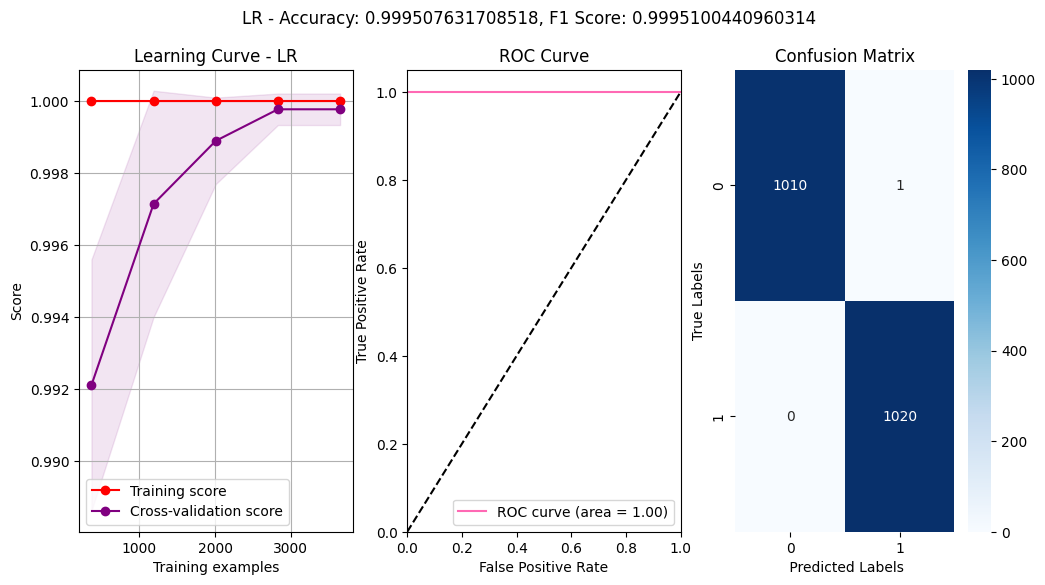



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Model: CART, Accuracy: 1.0, F1 Score: 1.0


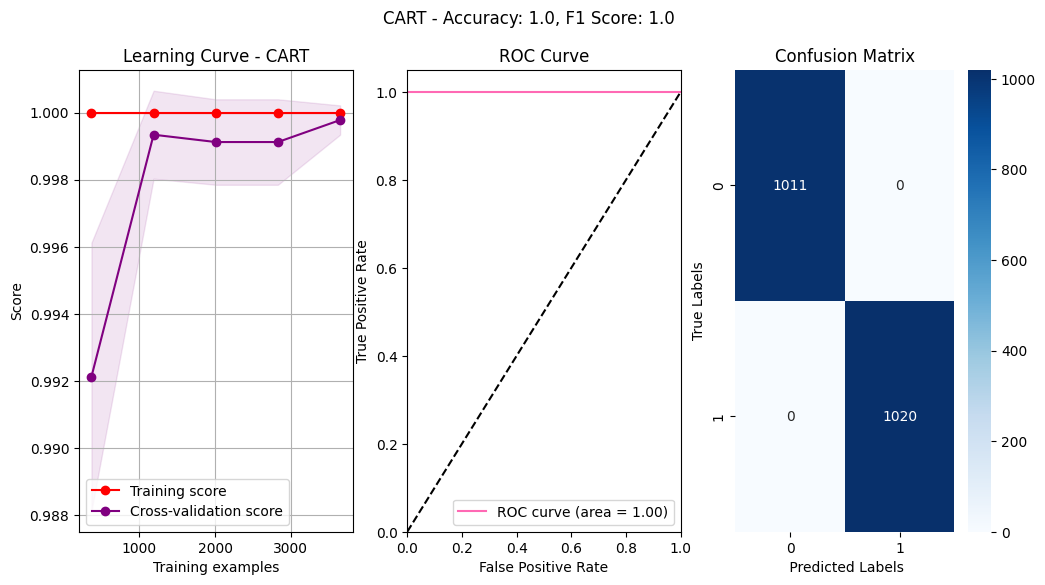



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Model: FOREST, Accuracy: 1.0, F1 Score: 1.0


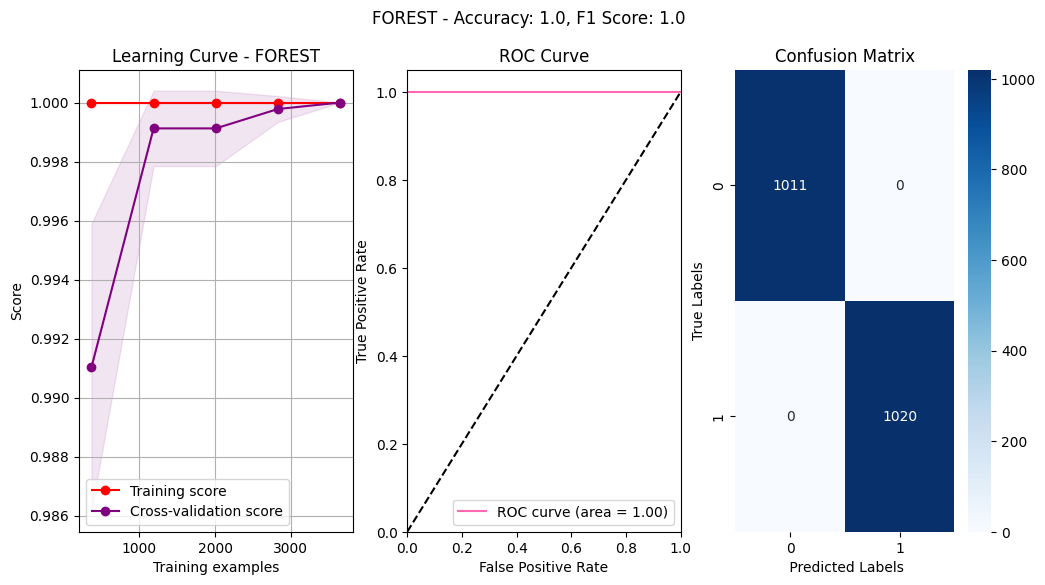



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [41]:
for name, model in models:
  evaluate_model(model, X_train, y_train, X_test, y_test, name)

🍄   Based on the initial training results, hypertuning does not actually appear to be necessary for any of the models chosed with the exception of Naive Bayes. For Naive Bayes, it is our assessment that this model is not an appropriate model for the dataset that we are analyzing.

Given the above attempt at hypertuning, the above learning curves and ROC curves for Logistic Regression, Decision Tree Classifier, and Random Forest Classifier indicate that there is some additional improvement in accuracy with the chosen hyper-tuning parameters.

So, in conclusion, I would probably eat it if any of these models said that it was edible. 😃